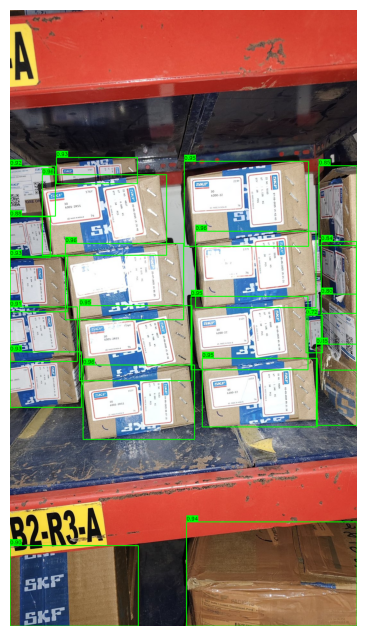

In [4]:
import requests
import cv2
import matplotlib.pyplot as plt
import os

# --- CONFIGURATION ---
API_URL = "https://lucile-proincrease-kathline.ngrok-free.dev/predict" 
IMAGE_FILENAME = "55437996-5bc4-4637-8691-6317e5eddd6d_resized.jpeg"

def process_and_visualize_inline():
    if not os.path.exists(IMAGE_FILENAME):
        print(f"Error: File '{IMAGE_FILENAME}' not found.")
        return

    # 1. Send Request
    try:
        with open(IMAGE_FILENAME, 'rb') as f:
            response = requests.post(API_URL, files={'file': f})
        response.raise_for_status()
        data = response.json()
    except Exception as e:
        print(f"API Error: {e}")
        return

    # 2. Load Image
    image = cv2.imread(IMAGE_FILENAME)
    if image is None:
        print("Error loading image.")
        return

    # 3. Draw Results
    results = data.get("results", [])
    for item in results:
        box = item.get("box")     
        score = item.get("score") 

        if box and len(box) == 4:
            x1, y1, x2, y2 = map(int, box)
            
            # Draw Box (Green)
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            
            # Draw Label
            label = f"{score:.2f}"
            (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
            cv2.rectangle(image, (x1, y1 - 20), (x1 + w, y1), (0, 255, 0), -1)
            cv2.putText(image, label, (x1, y1 - 5), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

    # 4. Convert Color BGR -> RGB (Critical for Matplotlib)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 5. Display Inline
    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    plt.axis('off') # Hide axes
    plt.show()

# Run
process_and_visualize_inline()